In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
sns.set()
rng = np.random.RandomState(1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#prep data so only Federer wins are included in the table
tennis = pd.read_csv("/content/drive/MyDrive/m3-3-engineering-regression/data/tennis.csv")
ten_rev = tennis.filter(['surface','player1 total points won'], axis=1)
ten_rev.head(10)

,surface,player1 total points won
0,Indoor: Hard,41.0
1,Indoor: Hard,65.0
2,Indoor: Hard,79.0
3,Indoor: Hard,60.0
4,Outdoor: Clay,NaN
5,Outdoor: Clay,63.0
6,Indoor: Hard,NaN
7,Indoor: Hard,NaN
8,Indoor: Hard,NaN
9,Indoor: Hard,NaN


In [4]:
ten_rev.shape

(1179, 2)

In [5]:
ten_rev.surface.unique()

array(['Indoor: Hard', 'Outdoor: Clay', 'Indoor: Carpet', 'Outdoor: Hard',
       'Outdoor: Grass', 'Indoor: Clay'], dtype=object)

In [6]:
ten_rev.dtypes

surface                      object
player1 total points won    float64
dtype: object

In [7]:
ten_rev.isna().sum().sum()
#about 10% of values will be NaN, so I'll need to add a constant

152

In [8]:
#run OLS with constant
sm.OLS(
    ten_rev['player1 total points won'],
    sm.add_constant(
        pd.get_dummies(ten_rev.surface, drop_first=True)
    )
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                         nan
Model:                                  OLS   Adj. R-squared:                    nan
Method:                       Least Squares   F-statistic:                       nan
Date:                      Mon, 24 May 2021   Prob (F-statistic):                nan
Time:                              17:57:59   Log-Likelihood:                    nan
No. Observations:                      1179   AIC:                               nan
Df Residuals:                          1173   BIC:                               nan
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        nan        nan         nan         nan
Indoor: Clay          nan        nan        nan        nan         nan         nan
Indoor: Hard          nan        nan        nan        nan         nan         nan
Outdoor: Clay         nan        nan        nan        nan         nan         nan
Outdoor: Grass        nan        nan        nan        nan         nan         nan
Outdoor: Hard         nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Indoor carpet is what's been dropped in the dummy acquisition,
#as we can see by the list

In [10]:
#run OLS without constant
sm.OLS(ten_rev['player1 total points won'],
       (pd.get_dummies(ten_rev.surface, drop_first=True))
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                     nan
Model:                                  OLS   Adj. R-squared (uncentered):                nan
Method:                       Least Squares   F-statistic:                                nan
Date:                      Mon, 24 May 2021   Prob (F-statistic):                         nan
Time:                              17:57:59   Log-Likelihood:                             nan
No. Observations:                      1179   AIC:                                        nan
Df Residuals:                          1174   BIC:                                        nan
Df Model:                                 5                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Clay          nan        nan        nan        nan         nan         nan
Indoor: Hard          nan        nan        nan        nan         nan         nan
Outdoor: Clay         nan        nan        nan        nan         nan         nan
Outdoor: Grass        nan        nan        nan        nan         nan         nan
Outdoor: Hard         nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A constant should definitively be added: adding a constant lowers the R-squared to 4.6%, whereas without one it's up to 86%. More importantly, without a constant the P values is 0 across all surfaces, which shows that the model is failing.

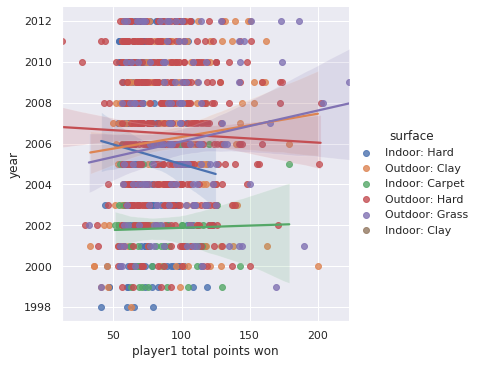

In [11]:
#try another view with seaborn
sns.lmplot(x='player1 total points won', y="year", hue="surface", data=tennis);

The seaborn diagrams reflect the coefficient values, with Outdoor grass consistently being the greatest point locale, and Indoor hard and carpet being the least likely over time.

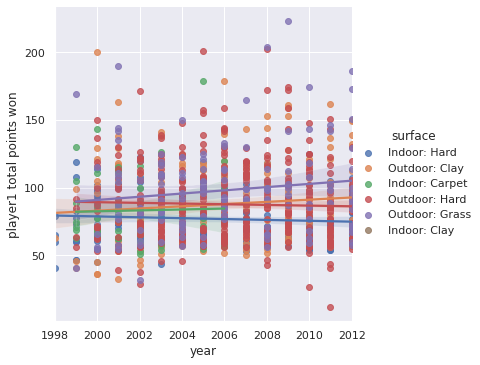

In [12]:
#try another option with seaborn
sns.lmplot(y='player1 total points won', x="year", hue="surface", data=tennis);

In [13]:
#run a ttest on the regression with an added constant
import scipy
scipy.stats.ttest_ind_from_stats(mean1=14.9386, mean2=-6.1456, std1=4.8599, std2=4.4635, nobs1=1027, nobs2=1022)

Ttest_indResult(statistic=102.26224072627484, pvalue=0.0)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [15]:
#LOOKOVER
ship = sns.load_dataset('titanic')
ship.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [16]:
ship.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
ship.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [18]:
""" column meaning
survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation"""
#source: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

' column meaning\nsurvival:    Survival \nPassengerId: Unique Id of a passenger. \npclass:    Ticket class     \nsex:    Sex     \nAge:    Age in years     \nsibsp:    # of siblings / spouses aboard the Titanic     \nparch:    # of parents / children aboard the Titanic     \nticket:    Ticket number     \nfare:    Passenger fare     \ncabin:    Cabin number     \nembarked:    Port of Embarkation'

In [19]:
#A FEW NOTES ALREADY#
#1. 38% of passengers survived (mean/survived in df description)
#2. only 6 of the data categories are computable at this point, so
#a dummy fetch is most likely going to be required to transform the 
#3. The Deck and Age categories seem to be missing lots of data, so evaluating

In [20]:
#check what is missing out of the data
total = ship.isnull().sum().sort_values(ascending=False)
percent_1 = ship.isnull().sum()/ship.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)
#Deck and Age will definitively be dropped

,Total,%
deck,688,77.2
age,177,19.9
embark_town,2,0.2
embarked,2,0.2
alone,0,0.0


In [21]:
#Looking over the factors in the table, I'd like to check if the following
#might contribute to survival: 

#preparing the barplots so I can get values
groupedvalues = ship.groupby('sex').sum().reset_index()
groupedvalues.head()

,sex,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,female,233,678,7286.00,218,204,13966.6628,0,126
1,male,109,1379,13919.17,248,136,14727.2865,537,411


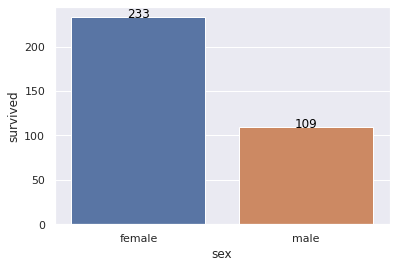

In [22]:
#females have over twice the survival rate that men have
g = sns.barplot(x='sex', y='survived', estimator = sum, data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.survived, round(row.survived,2), color='black', ha="center")

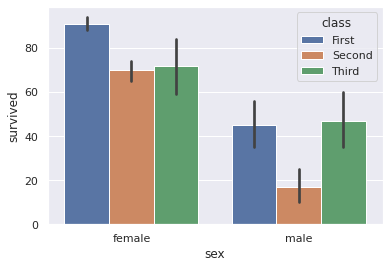

In [23]:
#females of any class had a higher survival rate than men. Second class females and males had
#a lower survival rate first and third class members of their gender
sns.barplot(x='sex',y='survived',hue = 'class',order=['female', 'male'], estimator = sum, data=ship)

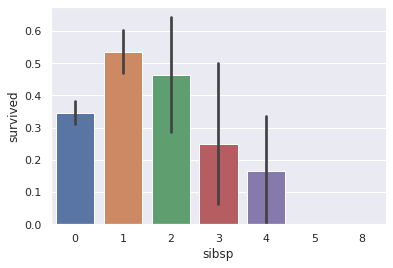

In [24]:
sns.barplot(x='sibsp', y='survived', data=ship)
#i'm using the mean value here so that the sibling/spouse values aren't added but
#it looks like if you had one or 2 people (spouse or sibling) but not more,
# your chances of survival were higher

In [25]:
#OK. Now that the factors are isolated, I'll fix the data so it's interpretable.
#survived = OK, int64 0/1 values
#pclass = OK, int64 1/2/3 values
#sex = string(object), needs to be converted to 0(male)/1(female) values
#sibsp = ok int64 (array([1, 0, 3, 4, 2, 5, 8]))

In [26]:
"""FIXING THE COLUMN
After changing the Sex object categorization by getting dummies,
OLS results were more difficult to interpret and the dummy
function kept having to be invoked. I decided to map genders
to 0 and 1 ints instead"""

genders = {"male": 0, "female": 1}
data = [ship]

for dataset in data:
  dataset['sex'] = dataset['sex'].map(genders)
ship.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,0,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,0,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,0,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,1,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,1,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [27]:
#non linear regression summary, sex and survival relationship
import statsmodels.api as sm

sm.OLS(ship.survived,
       sm.add_constant(
           pd.get_dummies(ship.sex, drop_first = True)
       )
).fit().summary()
#There's a high adjusted R-squared value as well as a high BIC and low std error coeff
#(it would be preferable if the first 2 were low and the std error close to 1)
#This is due to my factor-heavy dataframe. I will clean it up to only what I need
#and see how things are improved

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.41e-69
Time:                        17:58:03   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1889      0.017     11.102      0.000       0.156       0.222
1              0.5531      0.029     19.298      0.000       0.497       0.609
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
import statsmodels.api as sm
titan = ship[['survived', 'pclass', 'sex','sibsp']].copy()

import statsmodels.formula.api as smf
mod = smf.ols(formula = 'survived ~ pclass + sex + sibsp', data=titan)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               survived   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.01e-89
Time:                        17:58:03   Log-Likelihood:                -414.12
No. Observations:                 891   AIC:                             836.2
Df Residuals:                     887   BIC:                             855.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5703      0.041     14.030      0.0

In [29]:
import statsmodels.formula.api as smf
titan = ship[['survived', 'pclass', 'sex','sibsp']].copy()

import statsmodels.formula.api as smf
mod = smf.ols(formula = 'survived ~ pclass + sex', data=titan)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               survived   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 24 May 2021   Prob (F-statistic):           4.13e-89
Time:                        17:58:03   Log-Likelihood:                -417.76
No. Observations:                 891   AIC:                             841.5
Df Residuals:                     888   BIC:                             855.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5666      0.041     13.898      0.0

In [30]:
import statsmodels.api as sm
titan = ship[['survived', 'pclass', 'sex','sibsp']].copy()

import statsmodels.formula.api as smf
mod = smf.ols(formula = 'survived ~ pclass', data=titan)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.54e-25
Time:                        17:58:03   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8386      0.045     18.597      0.0

In [31]:
import statsmodels.api as sm
titan = ship[['survived', 'pclass', 'sex','sibsp']].copy()

import statsmodels.formula.api as smf
mod = smf.ols(formula = 'survived ~ sex', data=titan)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.41e-69
Time:                        17:58:03   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1889      0.017     11.102      0.0

In conclusion: gender is definitively the key factor in survival (>50%), followed by passenger class (15 % : 19% range of impact). Lets see which combinations of gender and class resulted in the highest survival rate.

In [32]:
titan['sex_class'] = titan.sex.astype(str) + '_' + titan['pclass'].astype(str)

sm.OLS(
    titan.survived,
    sm.add_constant(
        pd.get_dummies(titan['sex_class'], drop_first=True)
    )
).fit().summary()
#O_2 = male 2nd class
#0_3 = male 3rd class
#1_1 = female 1st class
#1_2 = female 2nd class
#1_3 = female 3rd class

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.32e-93
Time:                        17:58:03   Log-Likelihood:                -399.13
No. Observations:                 891   AIC:                             810.3
Df Residuals:                     885   BIC:                             839.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3689      0.034     10.721      0.000       0.301       0.436
0_2           -0.2114      0.050     -4.212      0.000      -0.310      -0.113
0_3           -0.2334      0.040     -5.836      0.000      -0.312      -0.155
1_1            0.5992      0.052     11.490      0.000       0.497       0.702
1_2            0.5522      0.056      9.944      0.000       0.443       0.661
1_3            0.1311      0.047      2.805      0.005       0.039       0.223
==============================================================================
Omnibus:                       80.766   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.275
Skew:                           0.817   Prob(JB):                     1.02e-22
Kurtosis:                       3.247   Cond. No.                         7.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Female 1st class: 60% chances of survival over male 1st class
Female 2nd class: 55%
Female 3rd class: 13%
Male 2nd class: 21% less chances than male 1st class
Male 3rd class: 23% less

Clearly, 2nd and 3rd class male passengers were the most notably disadvantaged.



# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [33]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

#regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#feature engineering
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge

#validation
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#making space for better data display
pd.set_option("display.max_rows", 999)
pd.set_option('display.max_rows', 500)

In [34]:
df = pd.read_csv("/content/drive/MyDrive/m3-3-engineering-regression/data/house_price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.shape

(1460, 81)

In [36]:
#Identify columns with many null values
df.isnull().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [37]:
#The following values immediately look like the should be dropped:
#LotFrontage
#Alley
#FireplaceQu
#PoolQC
#Fence
#MiscFeature
#The other features have enough observations that null rows can be dropped

#drop columns with few observations
df1 = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
df1.isnull().sum(axis = 0)

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [38]:
#drop all the rows with NA values
df1.dropna()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [39]:
#Check out how many of the columns are boolean and which are strings
df1.dtypes.sort_values
#Lots and lots of strings in there, a OHE conversion will be required

<bound method Series.sort_values of Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC     

Text(0.5, 1.0, 'Room to Price ratio')

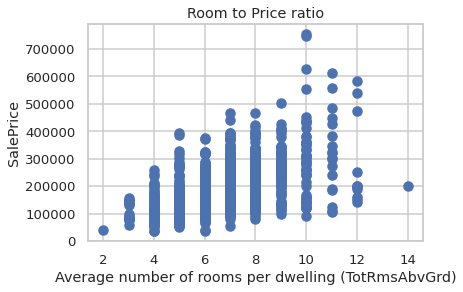

In [40]:
#Since price is the target variable, let's check one of the most often
#associated values, number of rooms.

# Scatter plot between *RM* and *PRICE*
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df1)
plt.xlabel("Average number of rooms per dwelling (TotRmsAbvGrd)")
plt.ylabel("SalePrice")
plt.title("Room to Price ratio")

With a bit of fluctuation (6 and 8 room houses, for example), the number of rooms have a linear relationship to the home's price. Homes with 12 rooms or more are outliers.


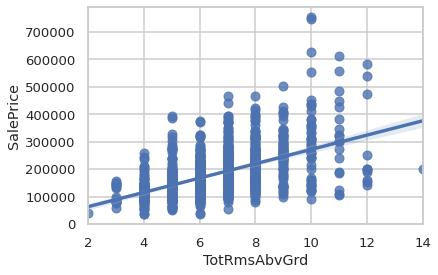

In [41]:
#Using seaborn's built-in regression plotting features to better illustrate this.
sns.regplot(y="SalePrice", x="TotRmsAbvGrd", data=df1, fit_reg = True)
#Room and price relationship is again confirmed.

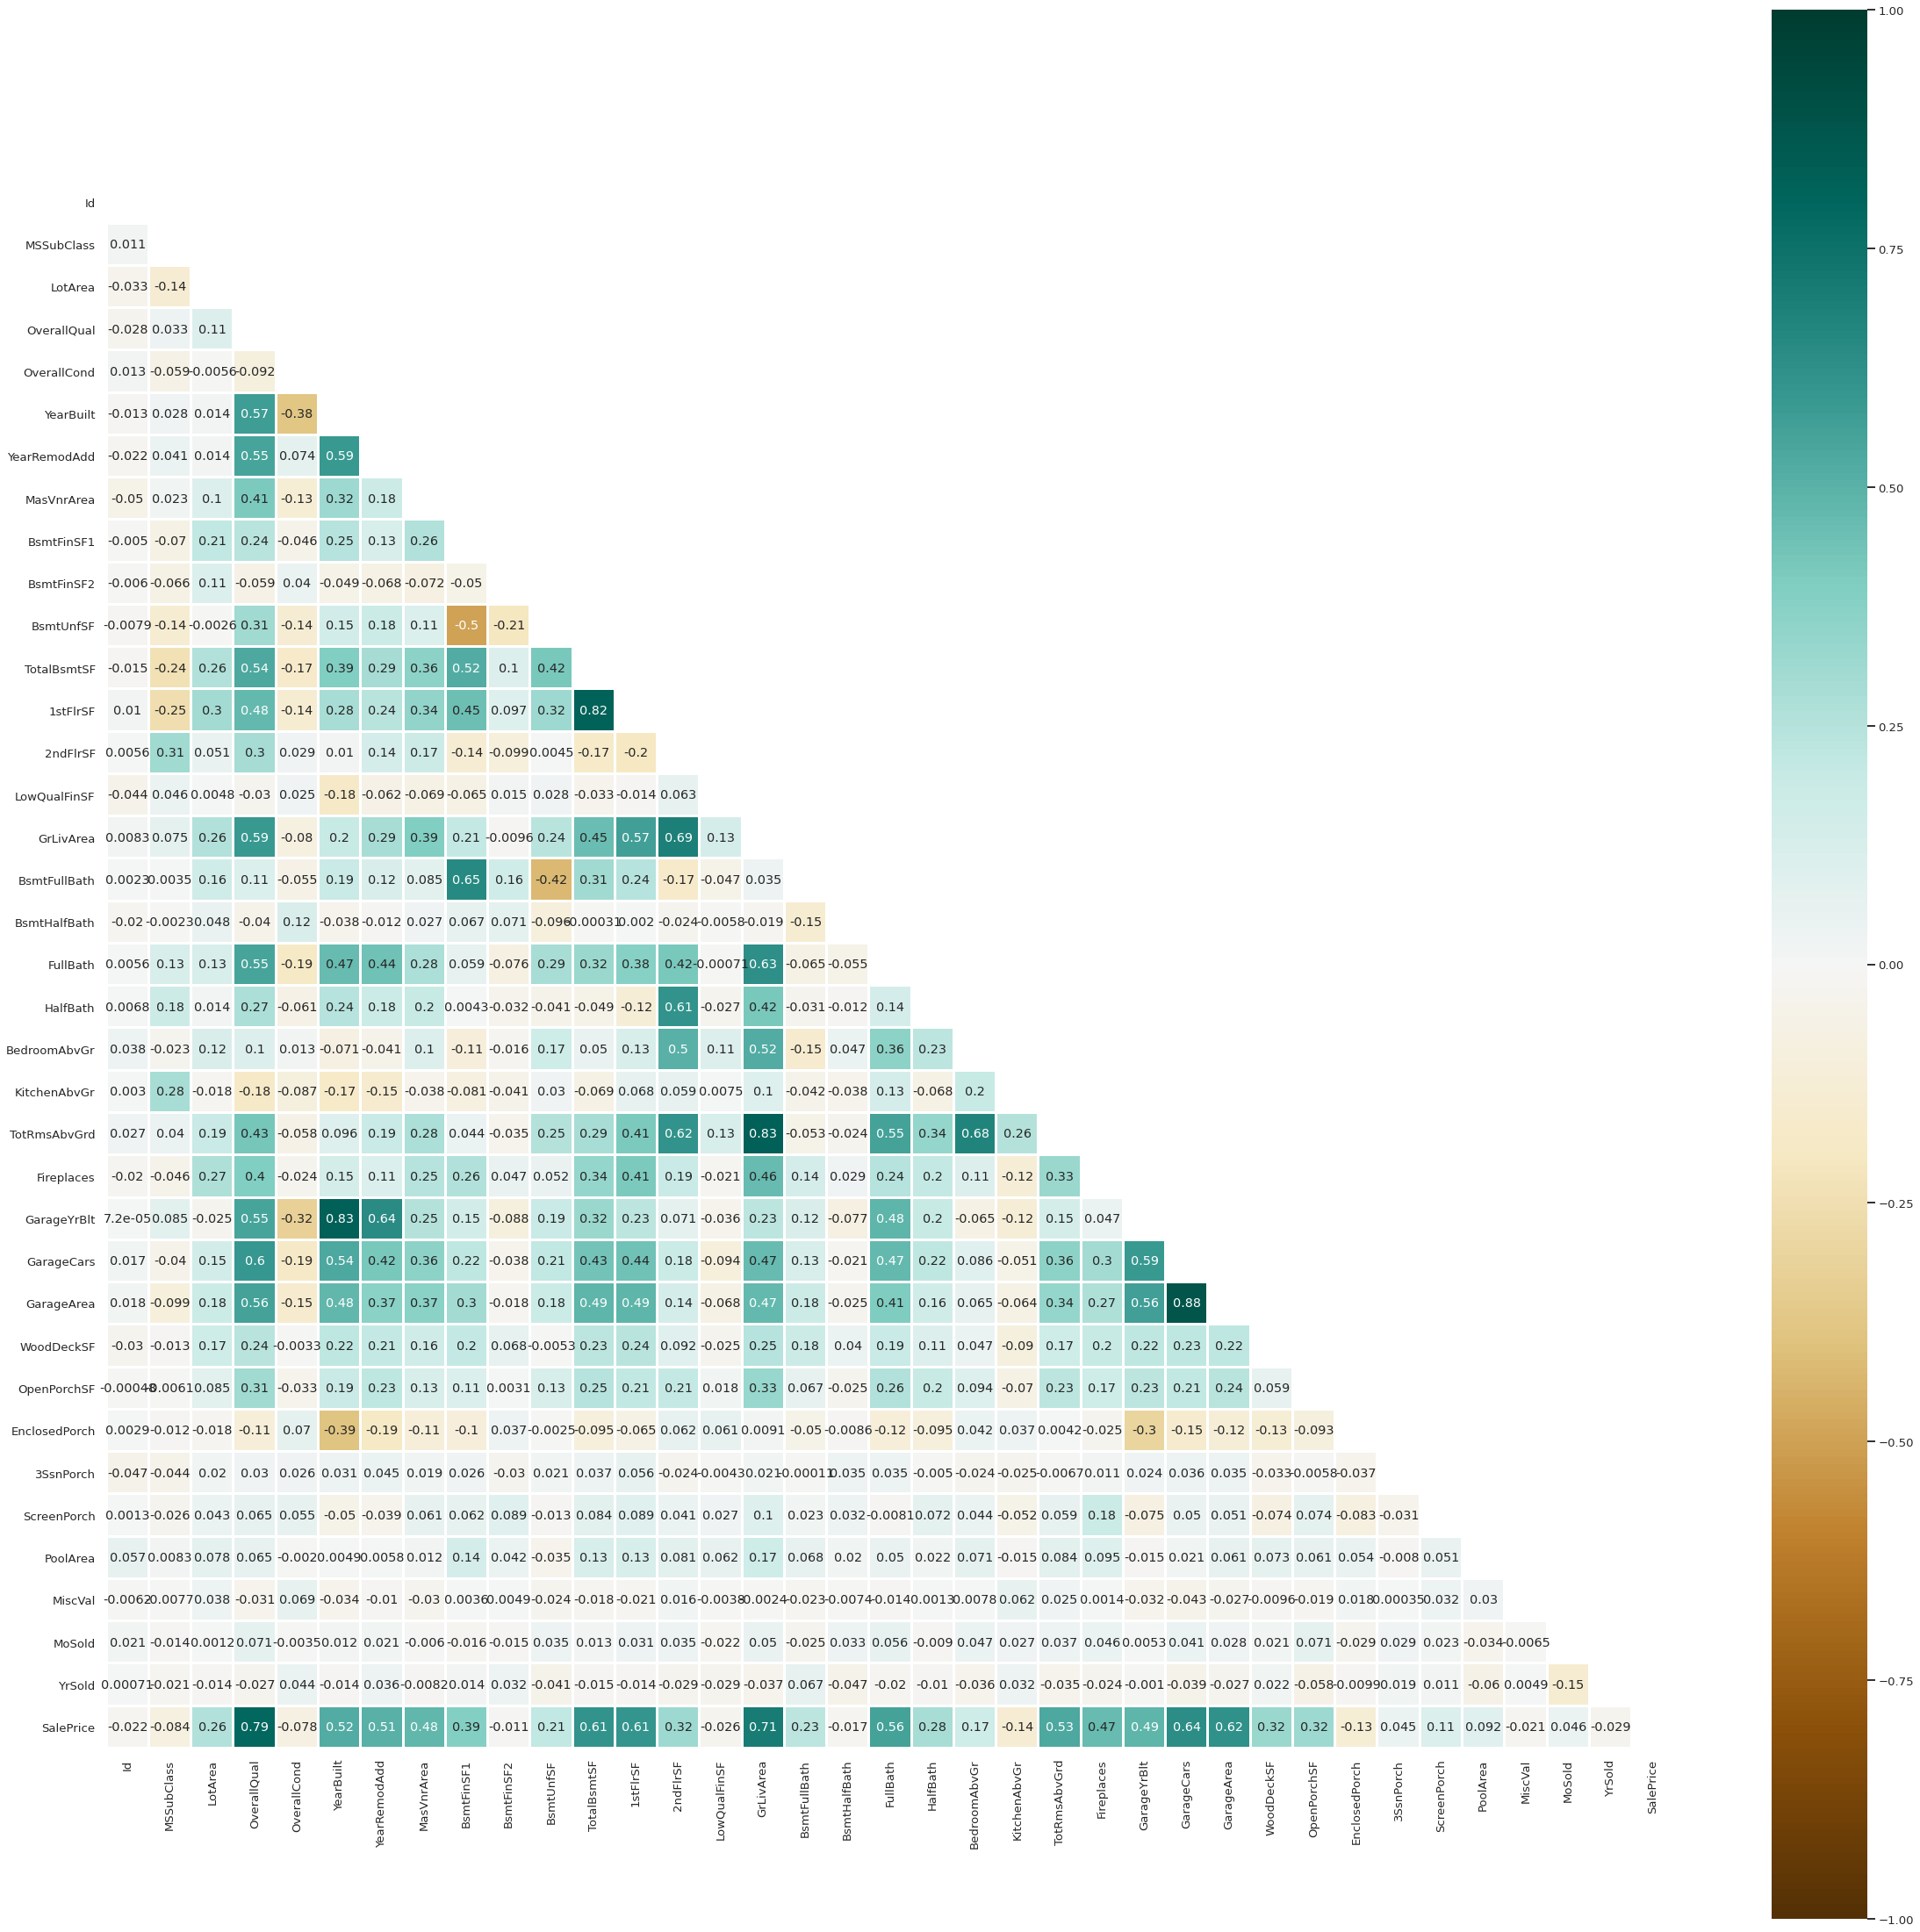

In [42]:
#Now let's look at a seaborn correlation matrix to see which factors i'll model
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(40,40))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, square=True, mask=mask, cmap='BrBG', linewidths=2)
plt.show()


In [52]:
#Top elements likely to drive price (>60%)

#OverallQual.unique(79%)
#GrLivArea (71%)
#TotalBsmtSF (61%)
#1stFlrSF (61%)
#GarageCars (64%)
#GarageArea (62%)

In [53]:

#After multiple essays in engineering the data while only keeping
#these key elements and doing OHE on OverallQual, i obtained results
#which validating these factors, but without insight too specific to the Boston market. Afterwards, I decided
#to try the more complex demonstrated solution to gain better engineering knowledge.

In [54]:
#Generate an easy-to-use list of column names
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [55]:
#remove NaN values from numerical obs
df.GarageYrBlt = df.GarageYrBlt.fillna(0)
df.LotFrontage = df.LotFrontage.fillna(0)
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

#replace NaN with "NA"
df = df.fillna("NA")

#convert into polynomials
poly = ['LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea',
        'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal']

#drop column from df
drop = ['Id', 'MoSold', 'YrSold', 'SalePrice', 'GarageYrBlt']

#OHE then drop
dummies = ['MSSubClass', 'MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
          'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'OverallQual',
          'OverallCond','RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
          'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          'Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual','Functional', 'FireplaceQu',
          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature',
          'SaleType', 'SaleCondition']

#keep as is
keep = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars']



In [68]:
#engineer data into entirely boolean obsv providing much more
#explanatory depth behind driving factors and suitable for regression

X = df.copy()

columns = X.columns

for column in columns:

  if column is drop:
      X = X.drop(columns = [columns])

  elif column in dummies:
    name = column + "_"
    X = X.join(pd.get_dummies(X[column], drop_first = True, prefix = name))
    X = X.drop(columns = [column])

  elif column in poly:
    X[column] = X[column].astype(int)
    name = column + "^2"
    X[name] = X[column] ** 2
    X[name] = column + "^3"
    X[name] = X[column] ** 3

X = sm.add_constant(X)


In [69]:
#set up y
y = df['SalePrice']

In [73]:
est = sm.OLS(y,X).fit()
est.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.167e+16
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        18:48:24   Log-Likelihood:                 6707.9
No. Observations:                1460   AIC:                        -1.334e+04
Df Residuals:                    1423   BIC:                        -1.315e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    2.17e-07   4.78e-07      0.454      0.650   -7.21e-07    1.15e-06
Id                     -1.539e-06   1.58e-07     -9.746      0.000   -1.85e-06   -1.23e-06
LotFrontage            -3.743e-07   2.68e-06     -0.140      0.889   -5.63e-06    4.88e-06
LotArea                 1.516e-07   1.44e-08     10.498      0.000    1.23e-07     1.8e-07
YearBuilt               8.322e-06   5.24e-06      1.587      0.113   -1.96e-06    1.86e-05
YearRemodAdd             2.62e-06   5.03e-06      0.521      0.602   -7.24e-06    1.25e-05
MasVnrArea             -3.873e-07   7.77e-07     -0.498      0.618   -1.91e-06    1.14e-06
BsmtFinSF1             -9.985e-09   2.79e-07     -0.036      0.971   -5.57e-07    5.37e-07
BsmtFinSF2              4.736e-08   5.51e-07      0.086      0.932   -1.03e-06    1.13e-06
BsmtUnfSF               1.322e-07    3.1e-07      0.427      0.670   -4.76e-07     7.4e-07
TotalBsmtSF             1.721e-07    3.6e-07      0.478      0.633   -5.34e-07    8.79e-07
1stFlrSF               -7.717e-07   1.15e-06     -0.672      0.502   -3.02e-06    1.48e-06
2ndFlrSF                2.408e-07   1.11e-06      0.218      0.828   -1.93e-06    2.41e-06
LowQualFinSF             1.75e-07   3.14e-06      0.056      0.956   -5.98e-06    6.33e-06
GrLivArea              -3.517e-07   1.08e-06     -0.326      0.745   -2.47e-06    1.77e-06
BsmtFullBath            1.555e-05      0.000      0.105      0.916      -0.000       0.000
BsmtHalfBath            -1.98e-05   5.81e-05     -0.341      0.733      -0.000    9.42e-05
FullBath                6.299e-05      0.000      0.587      0.557      -0.000       0.000
HalfBath               -9.416e-05      0.000     -0.794      0.427      -0.000       0.000
BedroomAbvGr               0.0002      0.000      1.504      0.133   -5.65e-05       0.000
KitchenAbvGr           -1.939e-05   4.81e-05     -0.403      0.687      -0.000    7.49e-05
TotRmsAbvGrd              -0.0002   9.29e-05     -2.434      0.015      -0.000   -4.39e-05
Fireplaces              4.456e-06   7.82e-05      0.057      0.955      -0.000       0.000
GarageYrBlt              5.87e-08   2.48e-07      0.237      0.813   -4.27e-07    5.44e-07
GarageCars              -3.84e-05   7.98e-05     -0.481      0.630      -0.000       0.000
GarageArea             -4.278e-07   1.03e-06     -0.416      0.678   -2.45e-06    1.59e-06
WoodDeckSF             -3.784e-07   8.21e-07     -0.461      0.645   -1.99e-06    1.23e-06
OpenPorchSF            -7.374e-07   1.54e-06     -0.477      0.633   -3.77e-06    2.29e-06
EnclosedPorch           8.443e-07   1.78e-06      0.474      0.635   -2.65e-06    4.34e-06
3SsnPorch               -3.91e-07   3.71e-06     -0.105      0.916   -7.67e-06    6.89e-06
ScreenPorch            -2.129e-07   2.06e-06     -0.104      0.918   -4.25e-06  

In [ ]:
#R-squared value is high at 1.0
#Given this more detailed view, prices would be at the highest in the following
#(coeff above 8 with low error rate)

"""Conclusion: Better engineering certainly provides more depth of understanding"
Neighborhood__Blueste
Neighborhood__BrkSide
Neighborhood__NoRidge
Neighborhood__Sawyer
MSSubClass__190
EnclosedPorch
FullBath
Condition2__RRNn (home both by highway and rail service)
Condition1__RRNn (home by highway)
BldgType__2fmCon
HouseStyle__2Story
BsmtExposure__No
BsmtFinType2__Rec
CentralAir__Y
SaleType__Oth"""